
Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-01_empty-bright_ecg.csv
Data shape: (299000, 1)

Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-01_empty-dark_ecg.csv
Data shape: (239000, 1)

Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-01_full-bright_ecg.csv
Data shape: (359000, 1)

Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-01_full-dark_ecg.csv
Data shape: (180000, 1)

Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-02_empty-bright_ecg.csv
Data shape: (299000, 1)

Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-02_empty-dark_ecg.csv
Data shape: (239000, 1)

Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-02_full-bright_ecg.csv
Data shape: (359000, 1)

Processing: /Users/firefly/Desktop/Team_Messung/data/rawdata/sub-02_full-dark_ecg.csv
Data shape: (180000, 1)

Plotting sub-01 - empty_bright
Raw ECG range: 214.00 to 815.00 mV
Filtered ECG range: -279.38 to 27

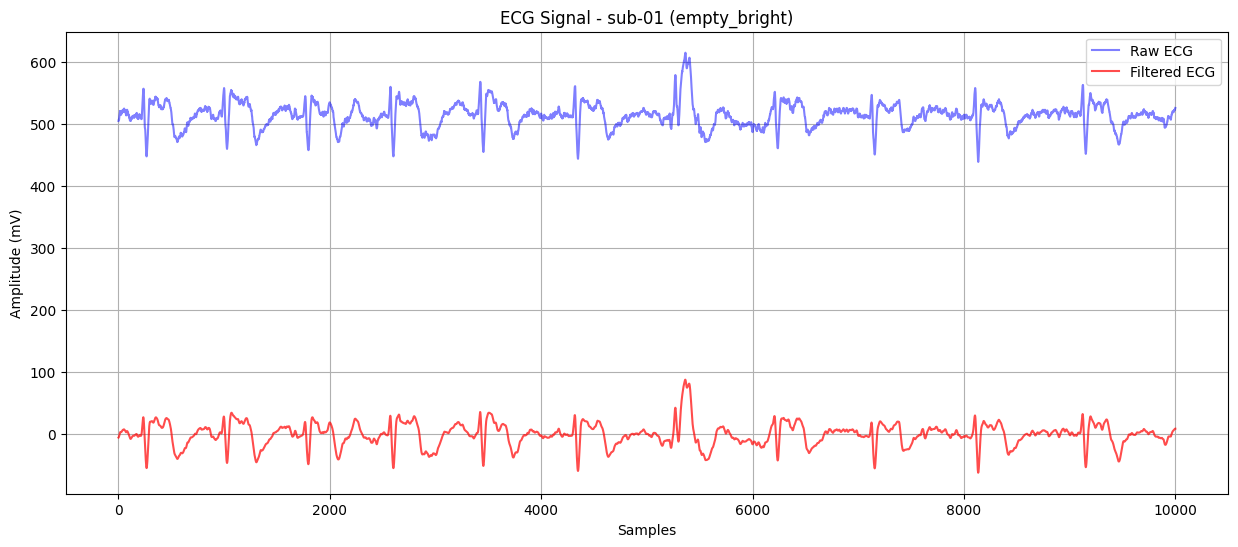

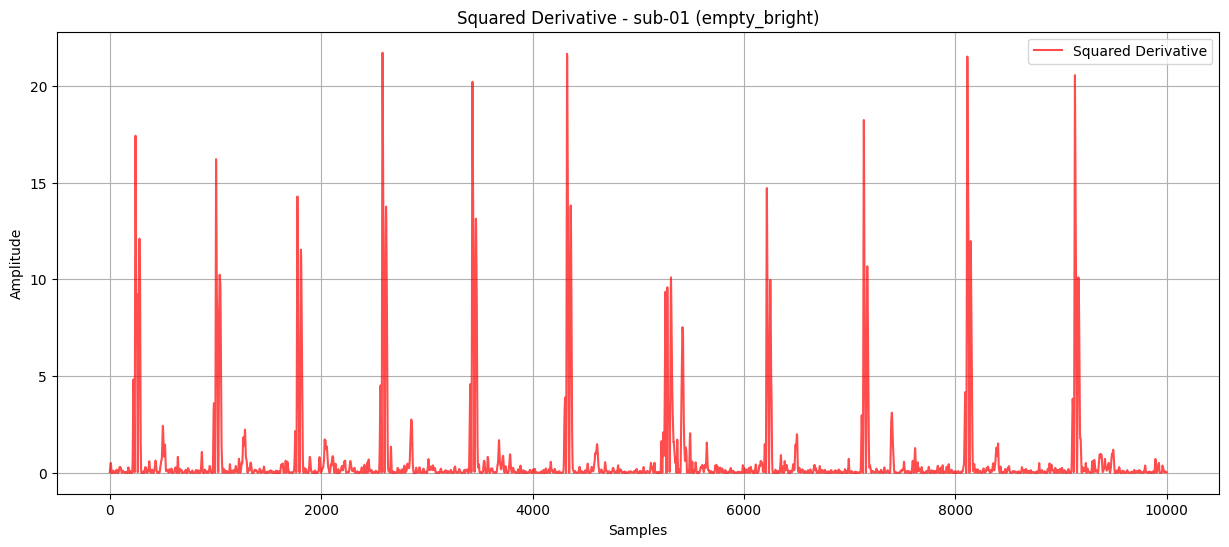


Plotting sub-01 - empty_dark
Raw ECG range: 333.00 to 672.00 mV
Filtered ECG range: -135.07 to 147.07 mV


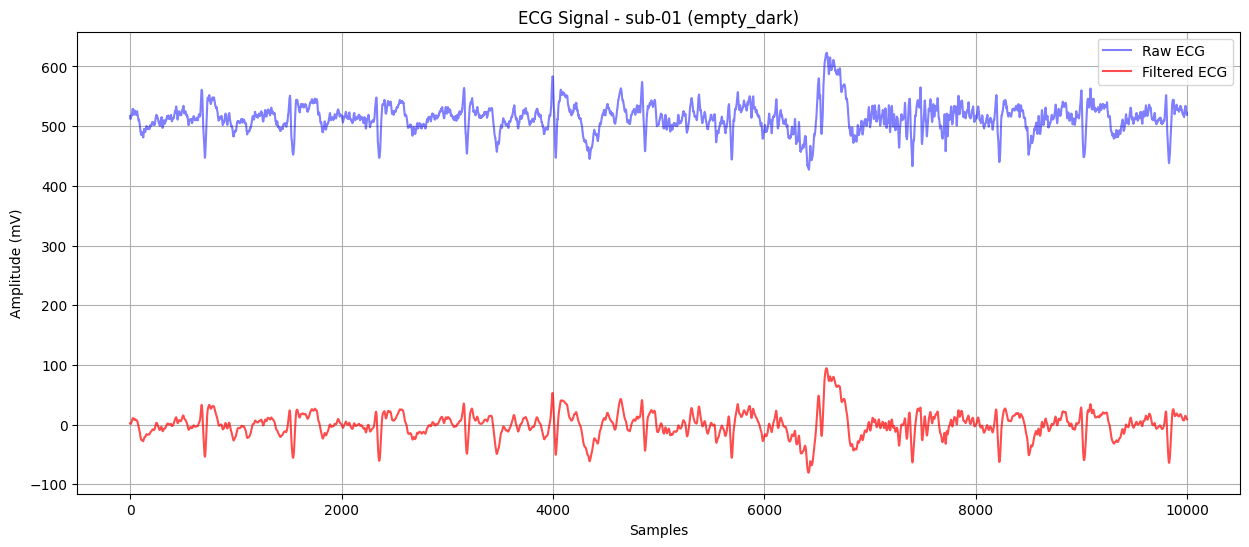

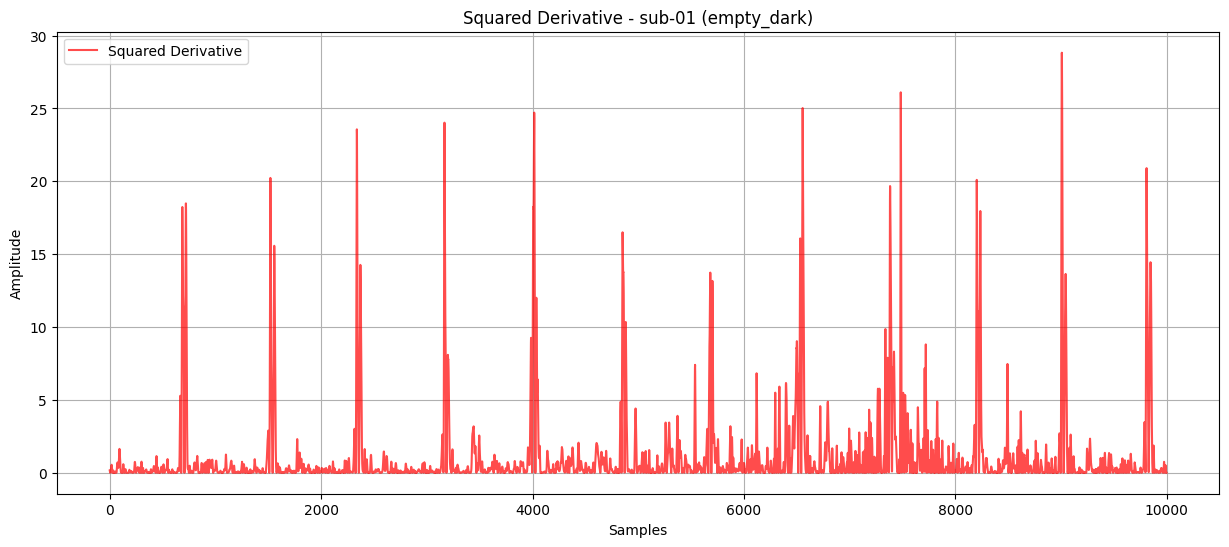


Plotting sub-01 - full_bright
Raw ECG range: 1.00 to 838.00 mV
Filtered ECG range: -436.38 to 304.55 mV


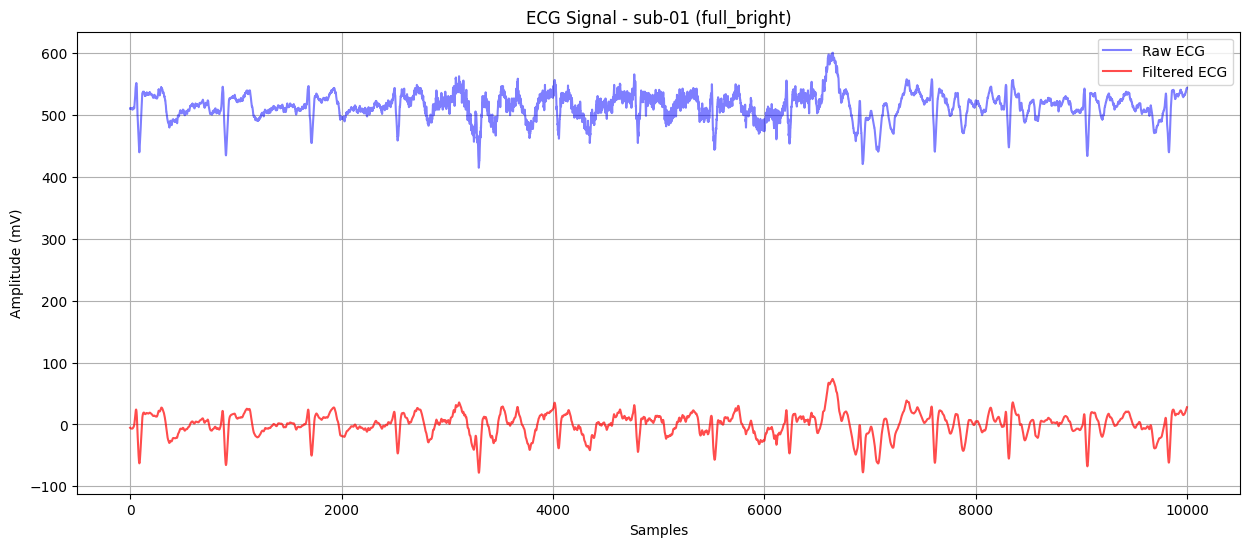

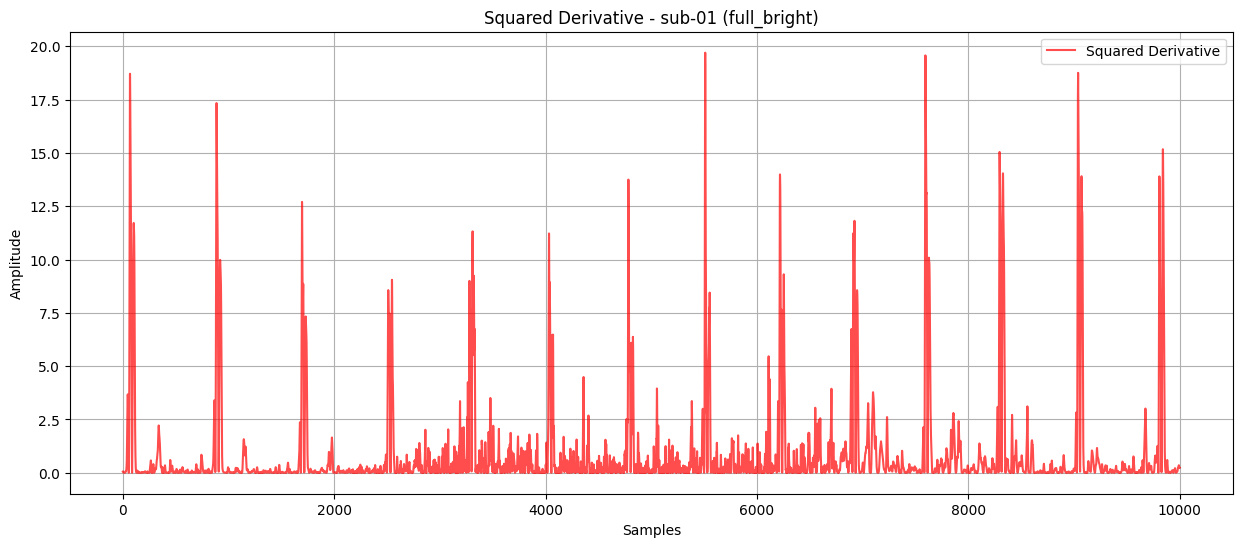


Plotting sub-01 - full_dark
Raw ECG range: 219.00 to 733.00 mV
Filtered ECG range: -266.56 to 206.04 mV


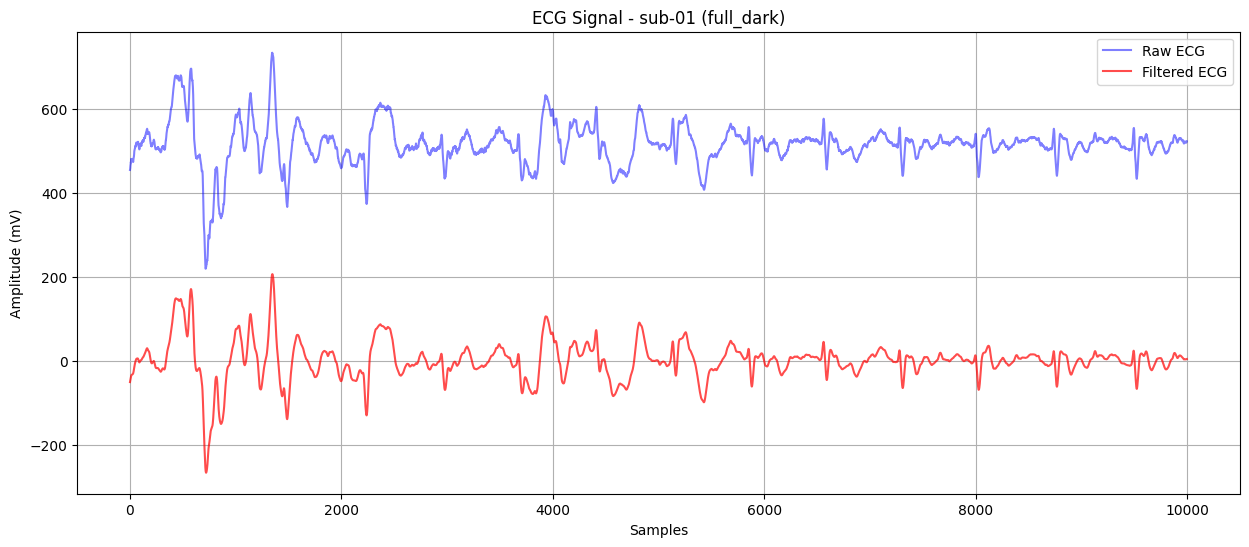

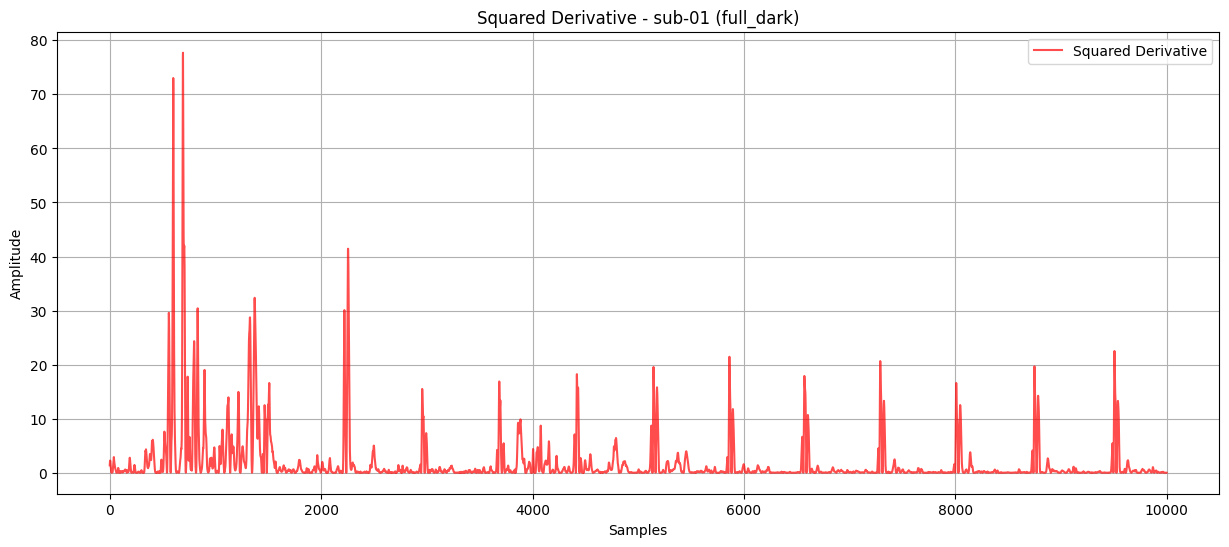


Plotting sub-02 - empty_bright
Raw ECG range: 363.00 to 613.00 mV
Filtered ECG range: -124.61 to 84.08 mV


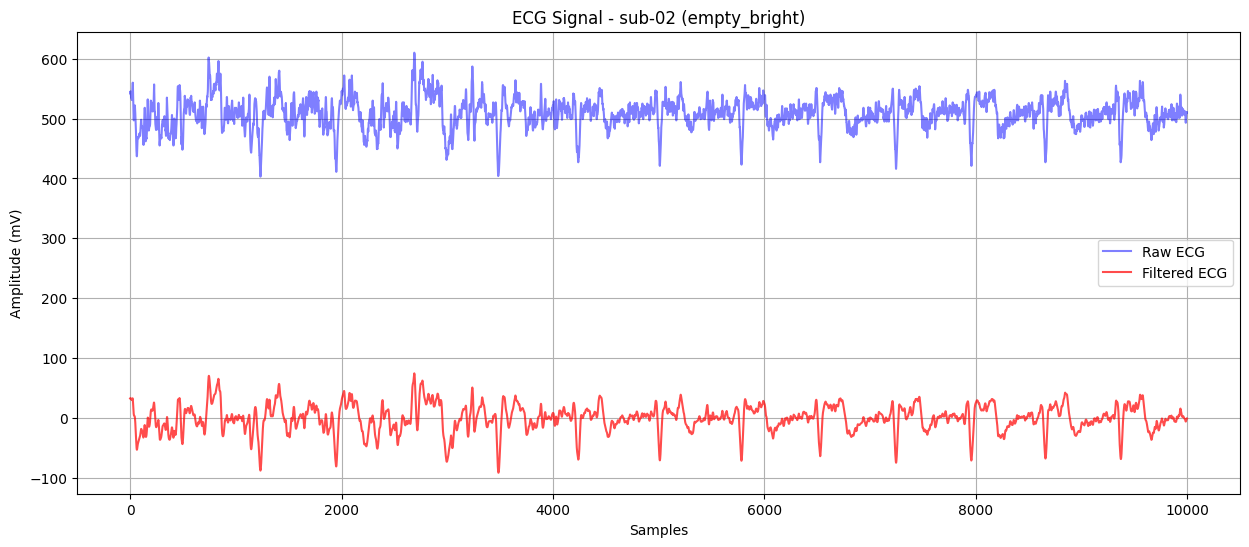

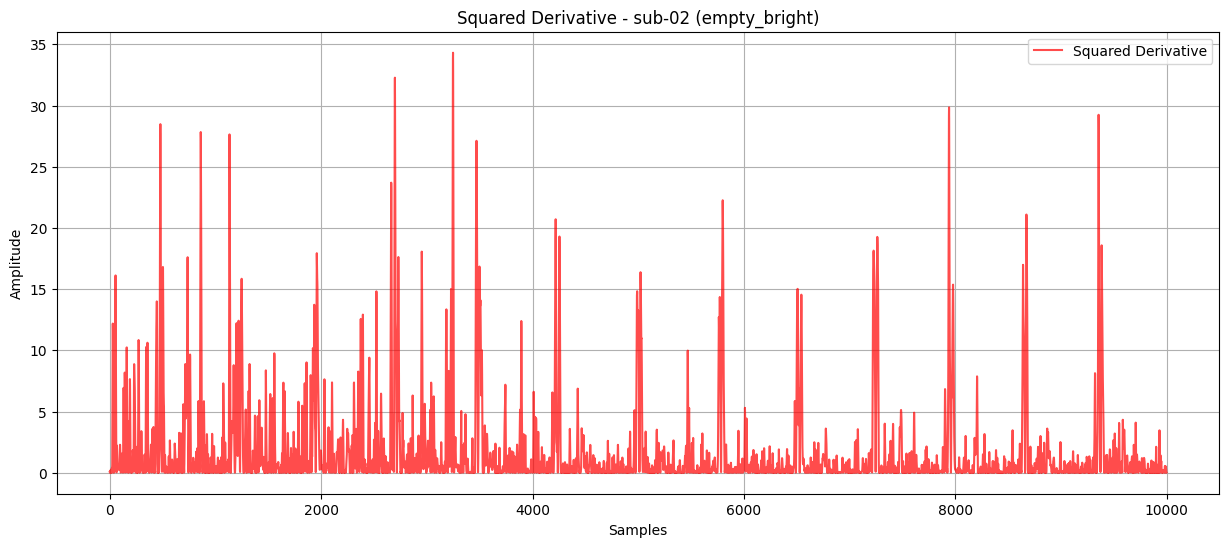


Plotting sub-02 - empty_dark
Raw ECG range: 364.00 to 613.00 mV
Filtered ECG range: -124.89 to 101.46 mV


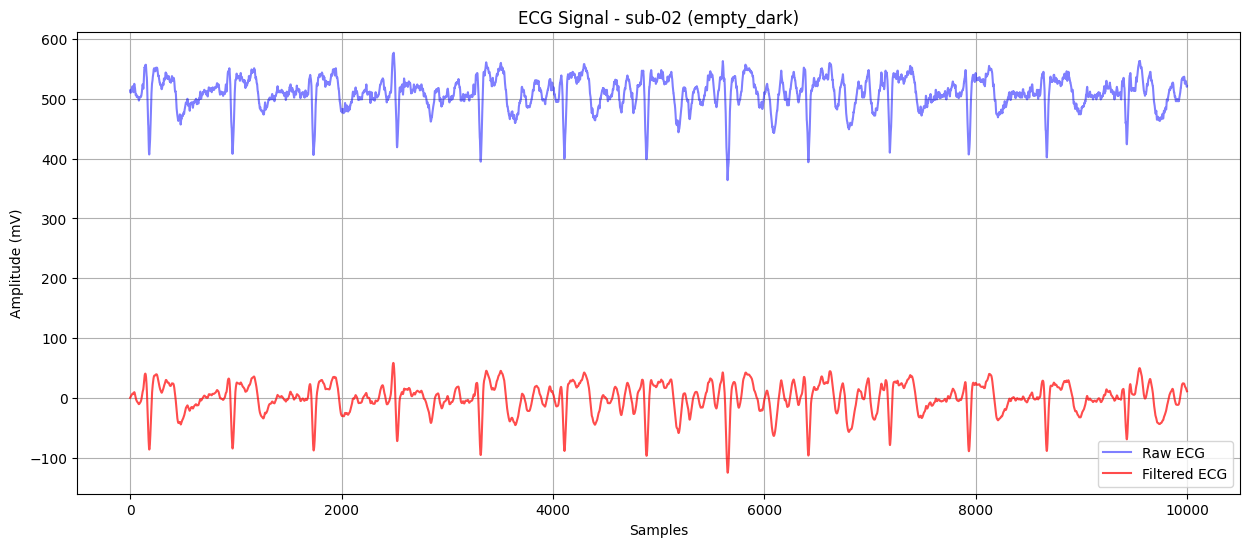

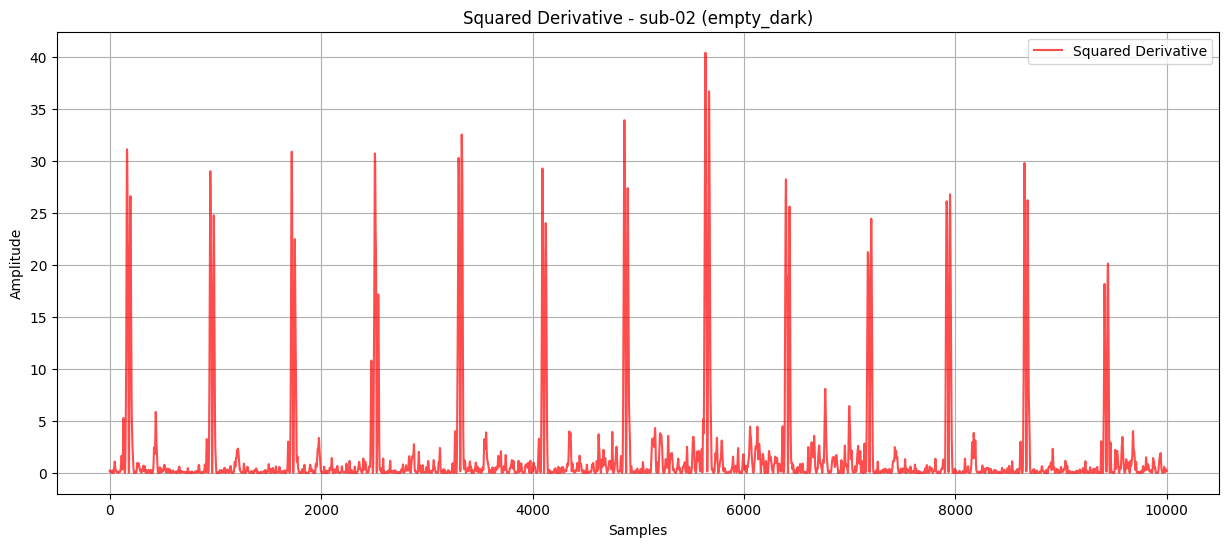


Plotting sub-02 - full_bright
Raw ECG range: 333.00 to 809.00 mV
Filtered ECG range: -166.37 to 277.19 mV


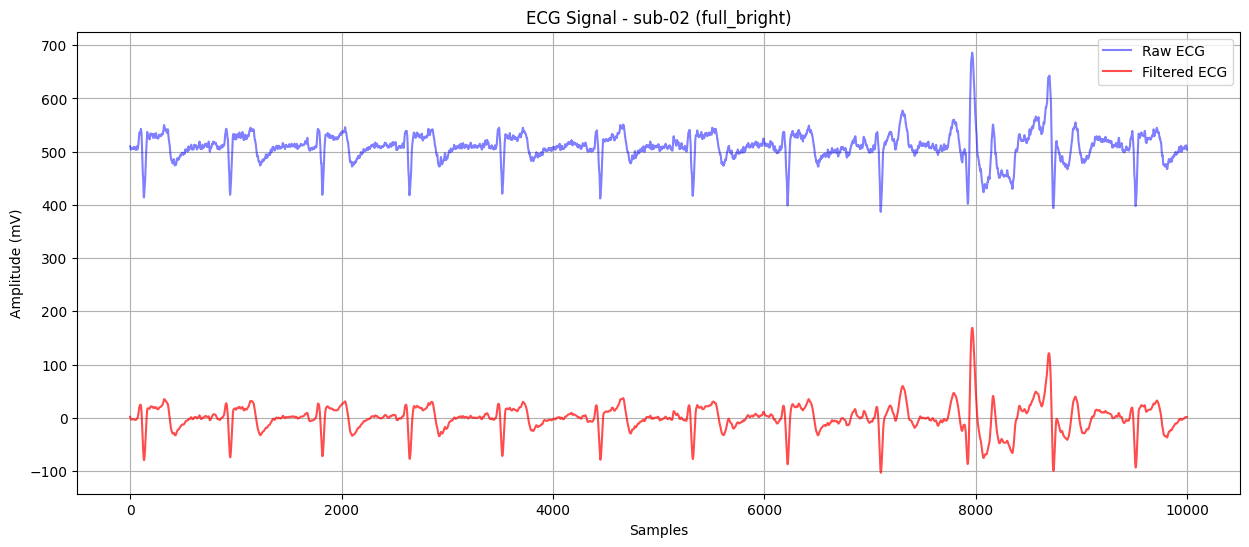

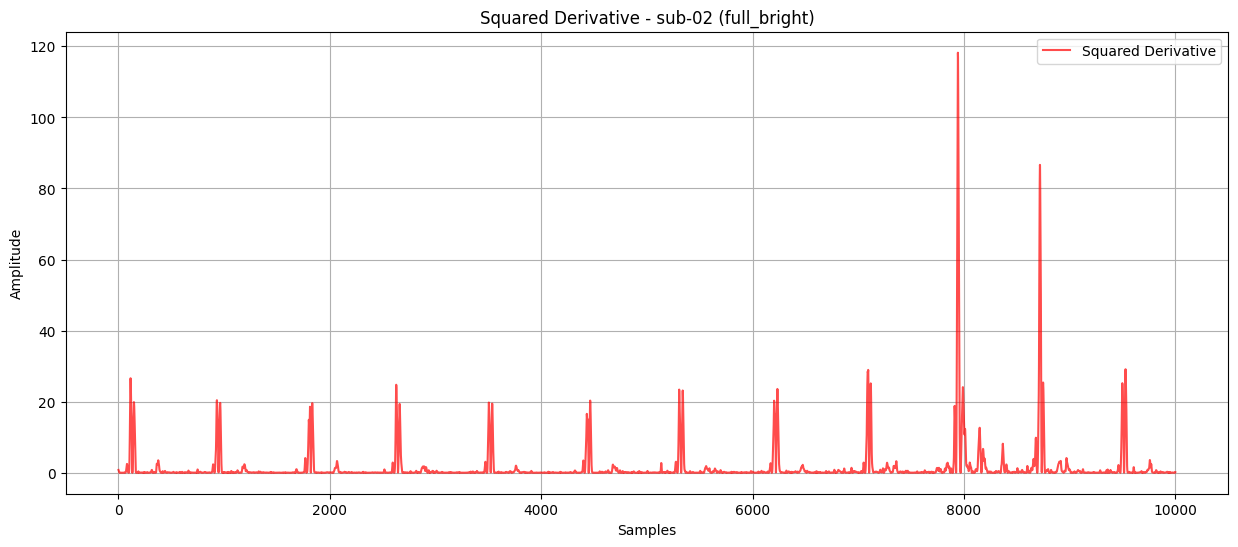


Plotting sub-02 - full_dark
Raw ECG range: 354.00 to 699.00 mV
Filtered ECG range: -138.06 to 182.31 mV


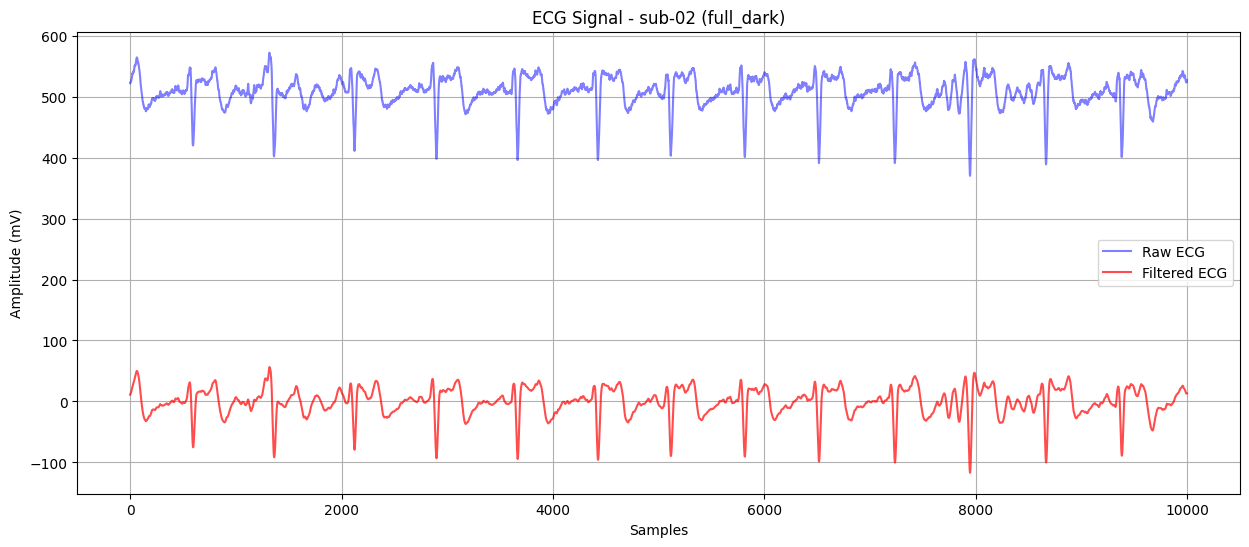

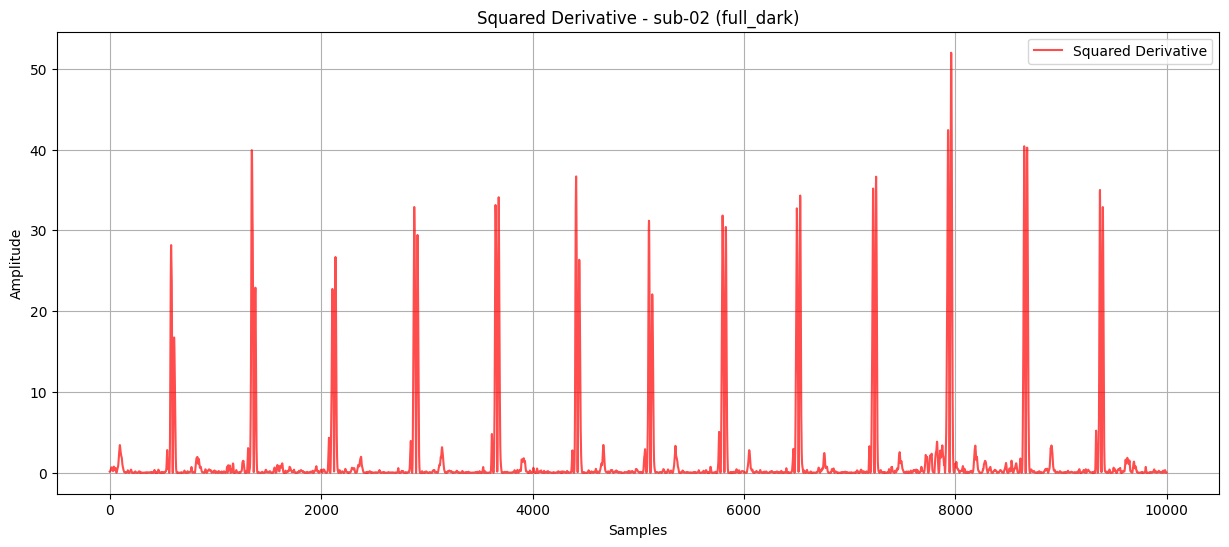


Preprocessed data saved to: /Users/firefly/Desktop/Team_Messung/data/preprocessed-data/preprocessed_ecg.pkl


In [4]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import pickle
import os

# File paths
raw_data_folder = '/Users/firefly/Desktop/Team_Messung/data/rawdata'
derivative_folder = '/Users/firefly/Desktop/Team_Messung/data/preprocessed-data'

# Parameters
participants = ['sub-01', 'sub-02']
conditions1 = ['empty', 'full']
conditions2 = ['bright', 'dark']

# Read and concatenate all data
alldata = []
for pi in participants:
    for c1 in conditions1:
        for c2 in conditions2:
            filename = f"{raw_data_folder}/{pi}_{c1}-{c2}_ecg.csv"
            print(f'\nProcessing: {filename}')
            
            try:
                # Read data
                subdata = pd.read_csv(filename)
                
                # Store data
                alldata.append({
                    "participant": pi,
                    "condition": f"{c1}_{c2}",
                    "data": subdata
                })
                
                print(f"Data shape: {subdata.shape}")
                
            except FileNotFoundError:
                print(f'File not found: {filename}')
                continue

# Filtering parameters
fs = 1000  # Sampling frequency
lowcut = 0.5
highcut = 30.0

# Create the Butterworth filter
b, a = signal.butter(1, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='band')

# Process each dataset
for participant_data in alldata:
    condition_name = participant_data["condition"]
    participant_name = participant_data["participant"]
    ecg_data = participant_data["data"]
    
    # Apply filters
    filtered_ecg = signal.filtfilt(b, a, ecg_data.to_numpy().flatten())
    derivative_ecg = np.diff(filtered_ecg)
    squared_ecg = np.square(derivative_ecg)
    
    # Store processed data
    participant_data["filtered_data"] = filtered_ecg
    participant_data["derive_sq_data"] = squared_ecg
    
    # Plot original and filtered ECG (10 seconds segment)
    plt.figure(figsize=(15, 6))
    plt.plot(ecg_data.to_numpy()[10000:20000], 
             label="Raw ECG", color='blue', alpha=0.5)
    plt.plot(filtered_ecg[10000:20000], 
             label="Filtered ECG", color='red', alpha=0.7)
    
    plt.title(f"ECG Signal - {participant_name} ({condition_name})")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude (mV)")
    plt.legend()
    plt.grid(True)
    print(f"\nPlotting {participant_name} - {condition_name}")
    print(f"Raw ECG range: {np.min(ecg_data.to_numpy()):.2f} to {np.max(ecg_data.to_numpy()):.2f} mV")
    print(f"Filtered ECG range: {np.min(filtered_ecg):.2f} to {np.max(filtered_ecg):.2f} mV")
    plt.show()
    
    # Plot squared derivative
    plt.figure(figsize=(15, 6))
    plt.plot(squared_ecg[10000:20000], 
             label="Squared Derivative", color='red', alpha=0.7)
    plt.title(f"Squared Derivative - {participant_name} ({condition_name})")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

# Create preprocessed data directory if it doesn't exist
os.makedirs(derivative_folder, exist_ok=True)

# Save preprocessed data
output_filename = f"{derivative_folder}/preprocessed_ecg.pkl"
with open(output_filename, 'wb') as f:
    pickle.dump(alldata, f)

print(f"\nPreprocessed data saved to: {output_filename}")